# Black Friday Sale Analysis & Prediction

Black Friday is a shopping holiday held the day after Thanksgiving. It is well-known for offering huge discounts and great deals on a variety of things such as electronics, home goods, clothing, and more. On Black Friday, many businesses offer exceptional doorbuster prices and longer hours, and it is generally one of the busiest shopping days of the year.

The dataset we have consists of 537578 rows and 12 columns.

Our primary goal will be to conduct various types of analyses and draw conclusions znd predictions that will allow us to deliver important market insights and so benefit the firm.

#### Business Problem:

The firm wants to gain important market insights and leverage the data from the Black Friday shopping event to make informed decisions and improve their business strategies. They aim to understand customer preferences, buying patterns, and the impact of demographics on purchase behavior. By conducting various analyses on the dataset, the firm aims to draw conclusions that will help them optimize their product offerings, target specific customer segments, and enhance their marketing efforts.
In addition to gaining market insights, the company also wants to leverage the data from the Black Friday shopping event to make predictions of customer purchases which will involve developing a machine learning model that can forecast whether a customer is likely to make a purchase during the Black Friday event based on various features such as demographics, product preferences, and buying patterns.

#### Business Statement:

Our objective is to analyze the dataset from the Black Friday shopping event to uncover valuable market insights. By thoroughly cleaning and examining the dataset, we will investigate various columns such as gender, age, marital status, city category, occupation, and product categories. Through comprehensive analysis, we will identify trends, preferences, and correlations between these variables. Additionally, we will delve into multi-column analyses to gain a deeper understanding of how age, gender, marital status, and city category collectively impact shopping behavior. Furthermore, we will explore the relationship between customer loyalty, gender, and marital status, and investigate the influence of occupation on product preferences. Lastly, we will focus on analyzing product category 1 to determine its significance and potential opportunities for improvement. By combining gender and marital status, we aim to identify specific customer segments for targeted marketing initiatives. The findings from our analyses will provide important market insights to the firm, enabling them to make data-driven decisions and enhance their business strategies.

#### We are going to divide the project into 11 parts:
1. Dataset Cleaning
2. Analyzing Columns
3. Analyzing Gender
4. Analysing Age & Marital Status
5. Multi Column Analysis of Age, Gender, Marital Status and City Category
6. Customers Stay in Current City, Gender & Marital Status Analysis
7. Occupation and Products Analysis
8. Analysing Product Category 1
9. Combining Gender & Marital Status
10. Prepare the data for different Regression ML Models
11. Apply different types of ML Models and check which suits the best and gives accurate predictions.

In [1]:
#importing libraries:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

In [2]:
df=pd.read_csv("C:\\Users\\LENOVO\\Documents\\BlackFriday.csv")
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


### Dataset Cleaning:

In [3]:
#The number of empty or null rows or columns in the dataset must be calculated:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

We discovered a large number of null values in the columns Product Category 2 and Product Category 3. So, if we try to utilise the function df.dopna() now, it will erase all the rows, perhaps causing a data loss problem later. 
As a result, we opt to eliminate the entire column instead, removing all of the null entries from our dataset.

In [4]:
del df["Product_Category_2"]
del df["Product_Category_3"]
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
537572,1004737,P00193542,M,36-45,16,C,1,0,1,11664
537573,1004737,P00111142,M,36-45,16,C,1,0,1,19196
537574,1004737,P00345942,M,36-45,16,C,1,0,8,8043
537575,1004737,P00285842,M,36-45,16,C,1,0,5,7172


### Analyzing Columns:

In [5]:
#Calculating the number of Unique Customers, Products, Gender, Age, and Occupation in our DataSet:
df.nunique()

User_ID                        5891
Product_ID                     3623
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               18
Purchase                      17959
dtype: int64

In [6]:
df["Stay_In_Current_City_Years"].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [7]:
#Finding The Total and Avearge Amount Spent by Users in the Black Friday Sale:
print("Total Purchase Made by Customers in the Sale is: ", df["Purchase"].sum())
print("Average Spend by a Customer is: ",df["Purchase"].sum()/len(df["Purchase"]))

Total Purchase Made by Customers in the Sale is:  5017668378
Average Spend by a Customer is:  9333.859852635065


### Analyzing Gender:

In this part, we will look directly at the Gender Column. So we have Male and Female values in the gender column. After performing some simple analysis, we discovered that the Male data in our dataset outnumbers the Female data. We even utilised the groupby method to determine which gender purchases the most in our dataset. We showed them in an attractive way by using a pie chart and bar diagram.

In [8]:
#To find how Times a Particular Gender has Purchased?
df.groupby('Gender').size()

Gender
F    132197
M    405380
dtype: int64

<Axes: title={'center': 'Gender Ratio'}>

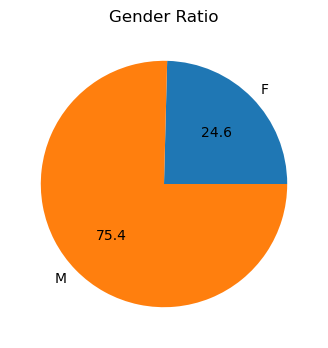

In [9]:
df.groupby('Gender').size().plot(kind='pie',
                                 autopct='%.1f',
                                 title="Gender Ratio",
                                 figsize=(5,4))

<Axes: xlabel='Gender'>

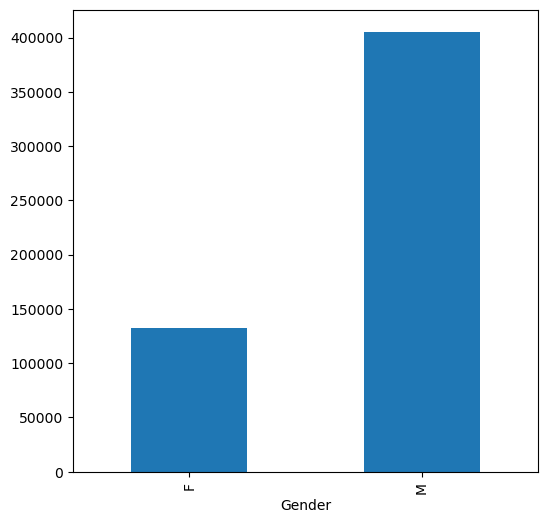

In [10]:
df.groupby('Gender').size().plot(kind = 'bar', 
                                 figsize = (6,6))

<Axes: title={'center': 'Percentage Spent by Both Genders'}, ylabel='Purchase'>

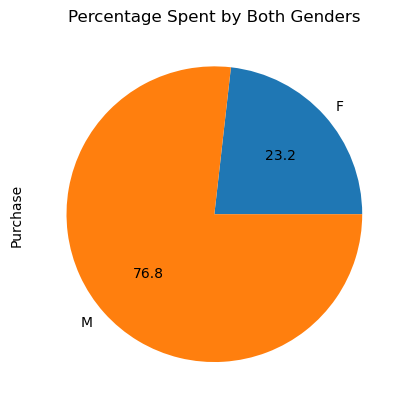

In [11]:
df.groupby("Gender").sum()["Purchase"].plot(kind="pie",
                                            autopct="%0.1f",
                                           title='Percentage Spent by Both Genders')

<Axes: title={'center': 'Average Amount Spent Per Product by Male and Female'}, ylabel='Purchase'>

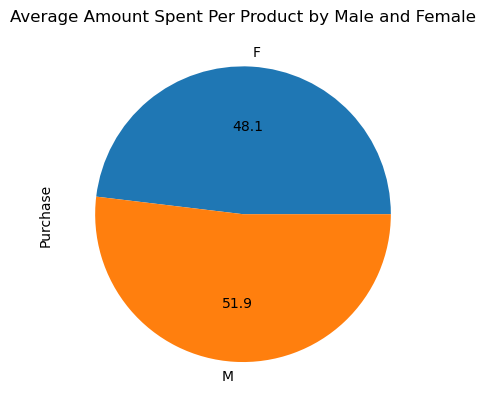

In [12]:
df.groupby("Gender").mean()["Purchase"].plot(kind="pie",
                                             autopct="%0.1f",
                                            title='Average Amount Spent Per Product by Male and Female')

### Analysing Age and Marital Status:

In this section, we will look at the age and marital status variables. So, once again, we can use the groupby function to check which age group is placing the most orders in our dataset. We can also determine which age group has the largest purchasing quantity in our dataset and exhibit all of the inferences using pie charts and bar plots. After performing some simple Marital Status analysis, we can observe that 60% of the persons in our dataset are single, whereas 40% are married. We've even shown them in pie chart form for easier comprehension.

<Axes: title={'center': "Purchase Distribution by Customer's Age"}, xlabel='Age', ylabel='Purchase'>

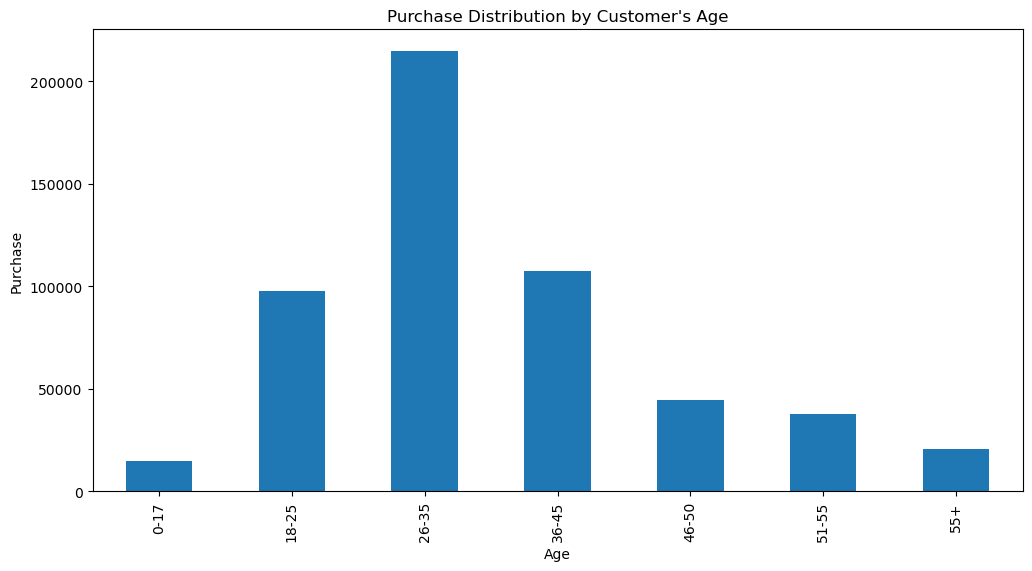

In [13]:
df.groupby('Age').size().plot(kind='bar',
                              figsize=(12,6),
                              title="Purchase Distribution by Customer's Age",
                             xlabel='Age',ylabel="Purchase")

<Axes: title={'center': "Amount Spent by Customer's Age"}, xlabel='Age', ylabel='Purchase'>

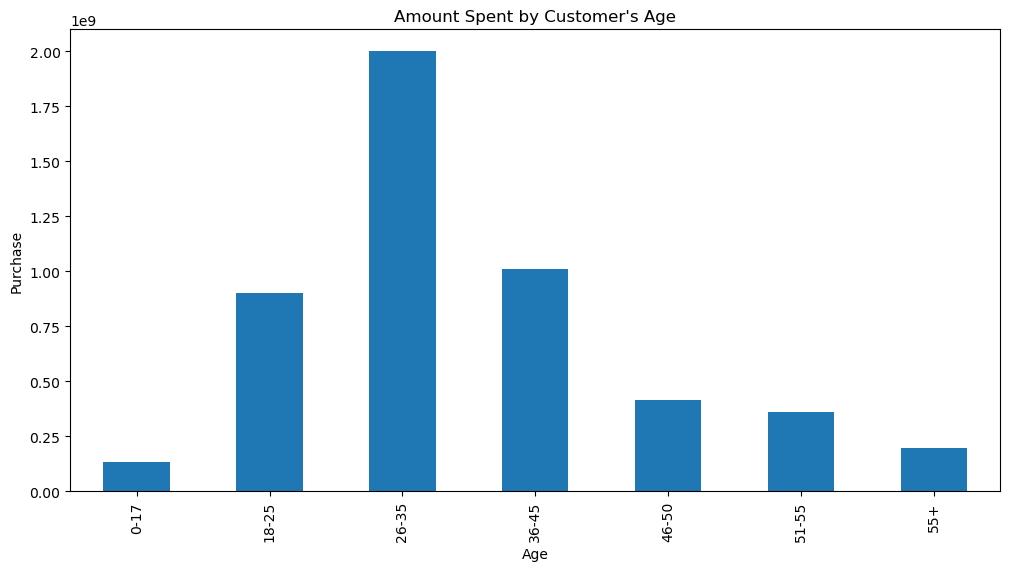

In [14]:
df.groupby('Age').sum()['Purchase'].plot(kind='bar',
                              figsize=(12,6),
                              title="Amount Spent by Customer's Age",
                             xlabel='Age',ylabel="Purchase")

<Axes: title={'center': 'Average Price Spent by Age'}, ylabel='Purchase'>

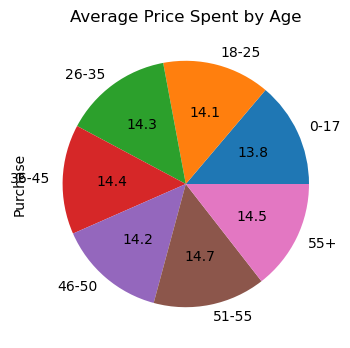

In [15]:
df.groupby('Age').mean()['Purchase'].plot(kind='pie',
                              figsize=(5,4),
                              title="Average Price Spent by Age",
                              autopct='%0.1f')

<Axes: title={'center': 'Products Purchased by Different Age Category'}, xlabel='Age'>

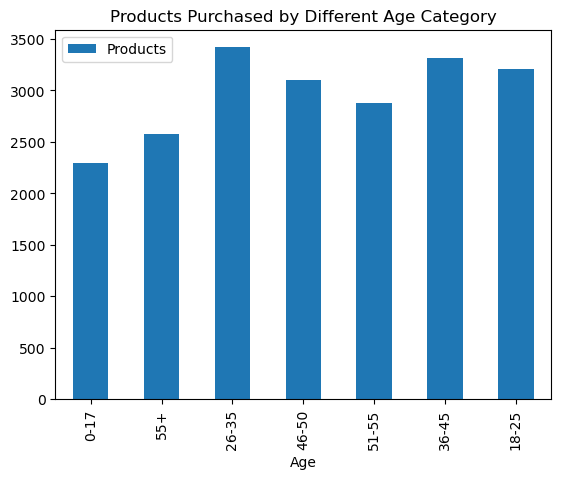

In [16]:
lst=[]
for i in df['Age'].unique():
    lst.append([i,df[df['Age']==i]["Product_ID"].nunique()])
data1=pd.DataFrame(lst,columns=['Age','Products'])
data1.plot.bar(x="Age",title="Products Purchased by Different Age Category")

<Axes: title={'center': 'Percentange of Married & Unmarried Customers'}, ylabel='Marital Status'>

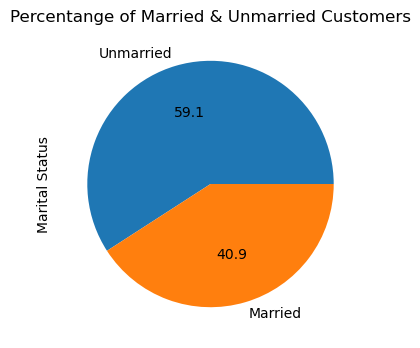

In [17]:
df.groupby('Marital_Status').size().plot(kind='pie',
                              figsize=(5,4),
                              title="Percentange of Married & Unmarried Customers",
                              autopct='%0.1f',labels=["Unmarried",'Married'],
                              ylabel="Marital Status")

###  Multi Column Analysis of Age, Gender, Marital Status and City Category:

So far, we've just explored Single Column analysis; now, let's move on to Multi Column analysis. We will use the Seaborn library to visualise and present them in a more visually appealing manner. We conducted analysis using the Age, Gender, Marital Status and City Category columns and displayed the results using the Seaborn library. We've also included legends, which is the colour parameter within the seaborn function. So, using the seaborn library, we can perform analysis on any number of columns of our choosing. 

[Text(0.5, 1.0, 'Purchase Distribution with Gender & Age')]

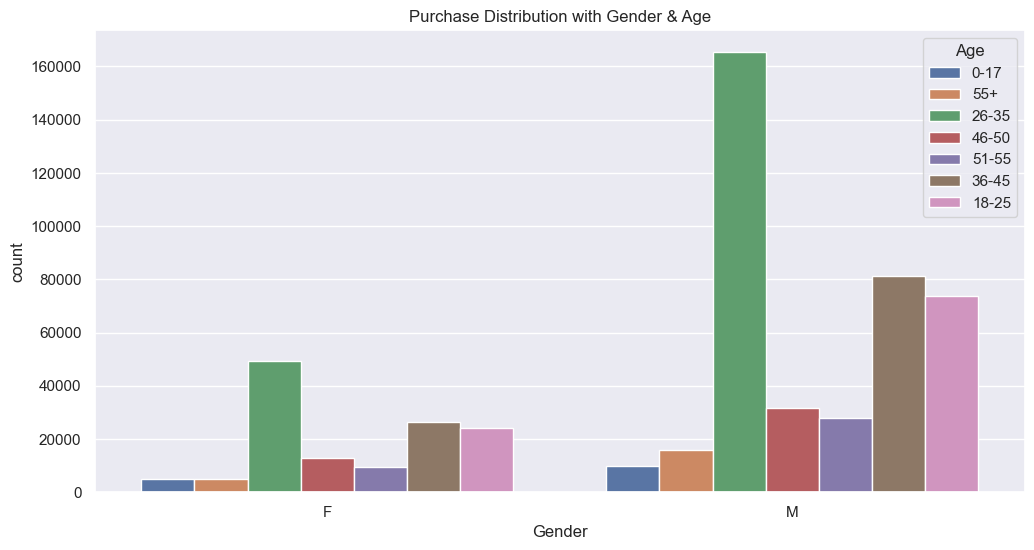

In [18]:
sns.set(rc={'figure.figsize':(12,6)})
sns.countplot(x="Gender",hue="Age",data=df).set(title="Purchase Distribution with Gender & Age")

[Text(0.5, 1.0, 'Purchase History with regards to Gender and Marital_Status')]

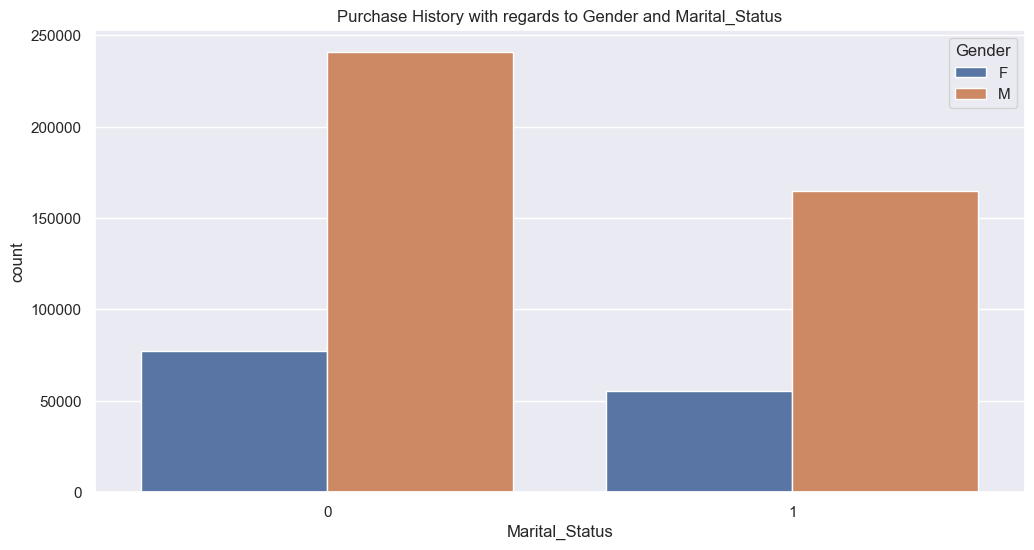

In [19]:
sns.set(rc={'figure.figsize':(12,6)})
sns.countplot(x="Marital_Status",hue="Gender",data=df).set(title="Purchase History with regards to Gender and Marital_Status")

[Text(0.5, 1.0, 'Purchasing Power-CITY Wise')]

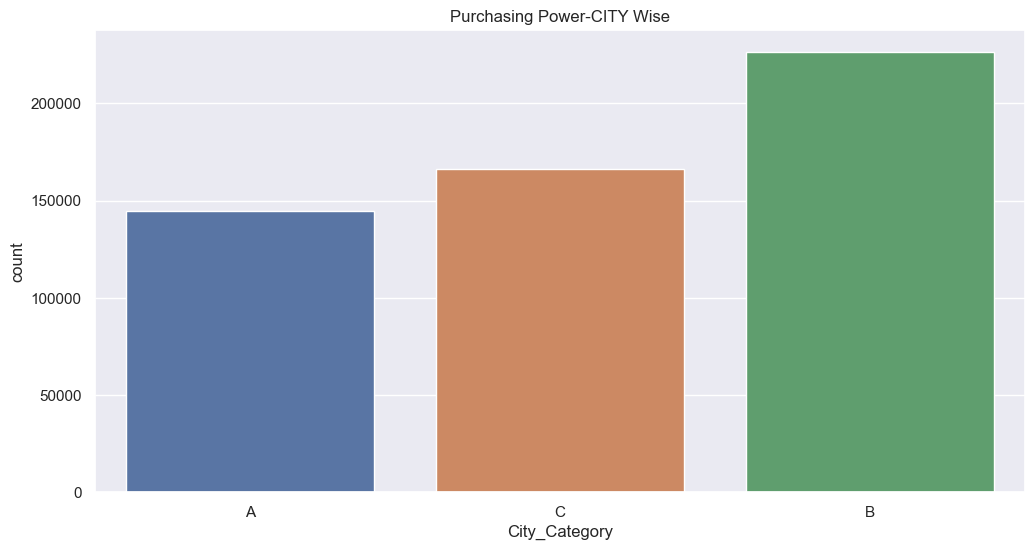

In [20]:
sns.countplot(x=df["City_Category"]).set(title="Purchasing Power-CITY Wise")

[Text(0.5, 1.0, 'Cities performing in terms of Customers Age')]

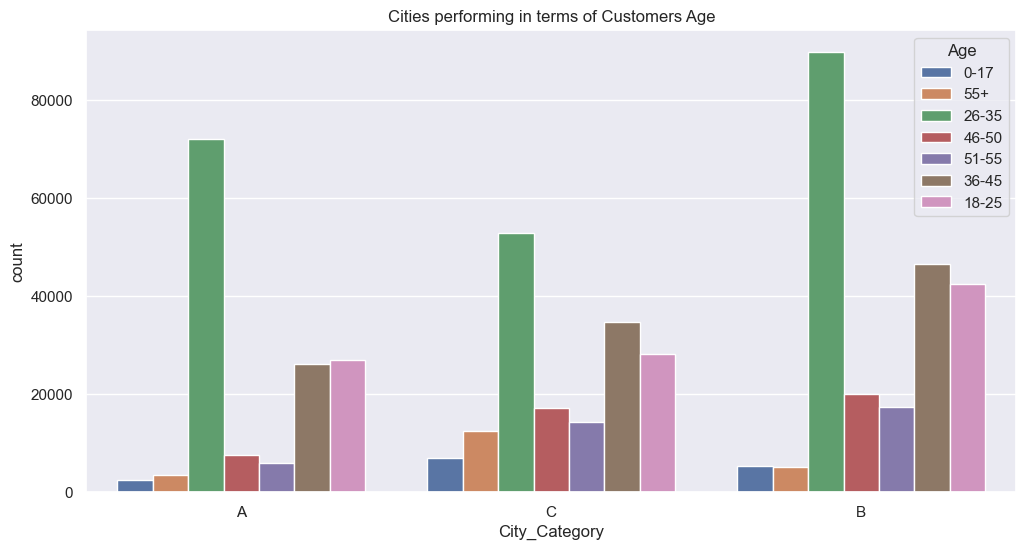

In [21]:
sns.countplot(x="City_Category",hue="Age",data=df).set(title='Cities performing in terms of Customers Age')

### Customers Stay in Current City, Gender & Marital Status Analysis:

<Axes: title={'center': 'Percentage of Customers staying in the Cities'}>

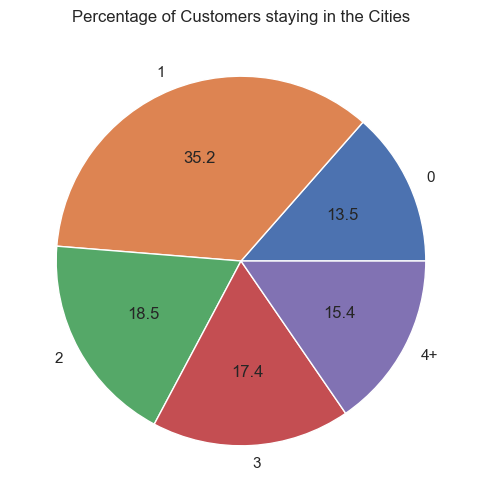

In [22]:
df.groupby('Stay_In_Current_City_Years').size().plot(kind="pie",autopct="%0.1f",title="Percentage of Customers staying in the Cities")

[Text(0.5, 1.0, 'Purchasing Power according to the Gender and stay in current City Years')]

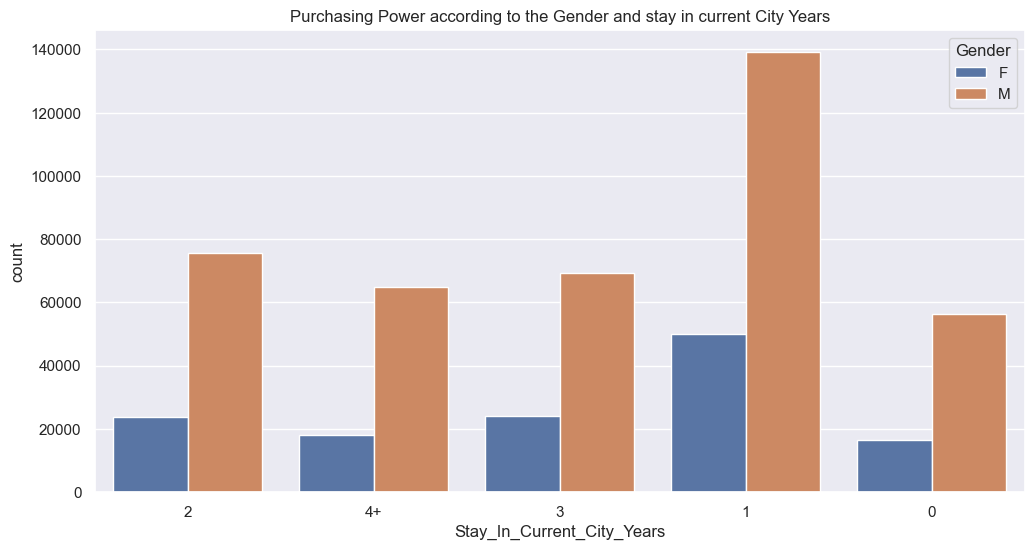

In [23]:
sns.countplot(x='Stay_In_Current_City_Years',hue='Gender',data=df).set(title="Purchasing Power according to the Gender and stay in current City Years")

[Text(0.5, 1.0, 'Stay in Current Year with Marital Status showing Purchasing Power of Customers')]

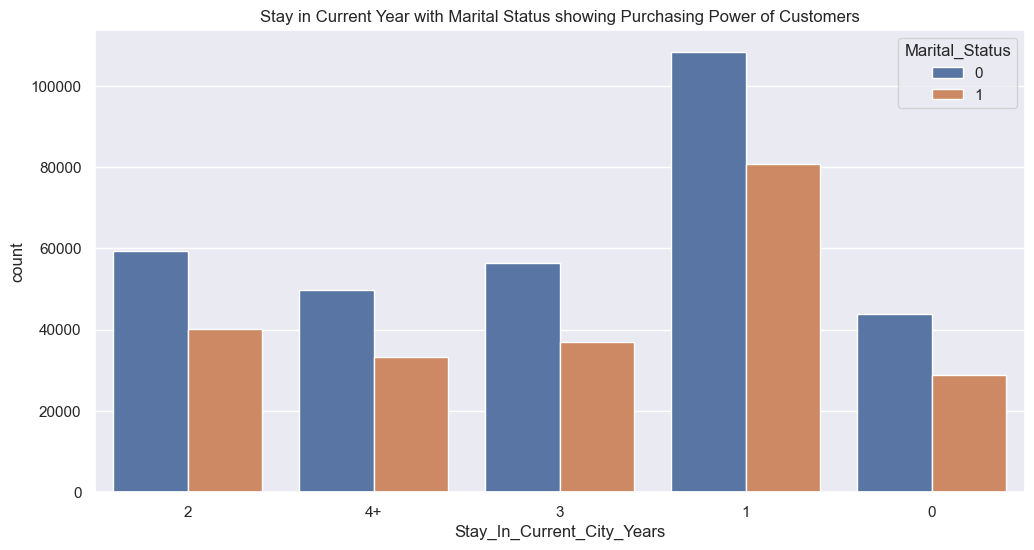

In [24]:
sns.countplot(x='Stay_In_Current_City_Years',hue='Marital_Status',data=df).set(title="Stay in Current Year with Marital Status showing Purchasing Power of Customers")

[Text(0.5, 1.0, 'Cities to Target ')]

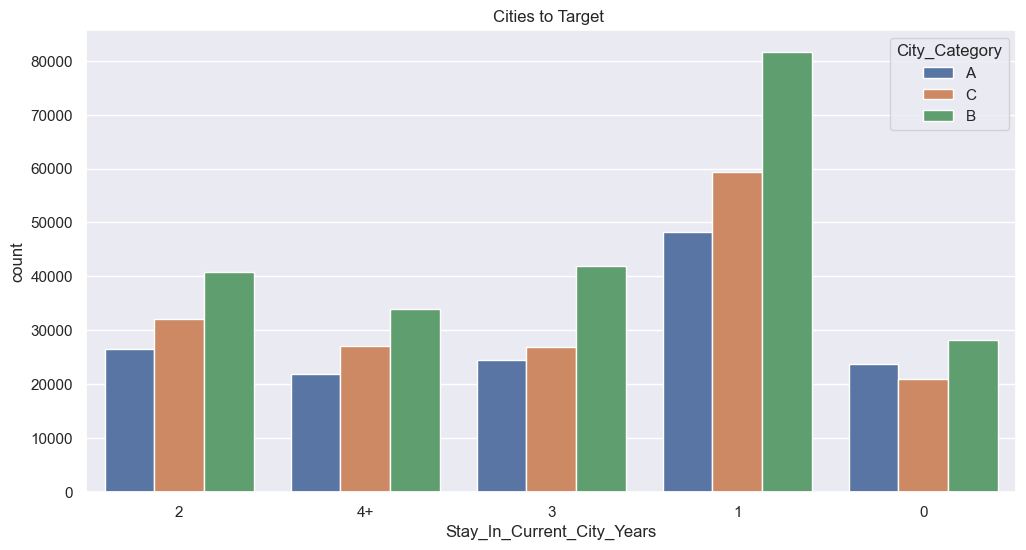

In [25]:
sns.countplot(x='Stay_In_Current_City_Years',hue='City_Category',data=df).set(title="Cities to Target ")

### Occupation and Product Analysis:

We will repeat the data visualisations we did previously but now for the Occupation, Product ID, and Product Category 1 columns. We can learn a lot about which kind of data are prevalent in our collection by using the countplot. We also used the groupby method to create standard bar plots to determine which Product ID had the highest purchase amount in our dataset.

<Axes: title={'center': 'Purchasing Power of Customers According to their Occupation'}, xlabel='Occupation'>

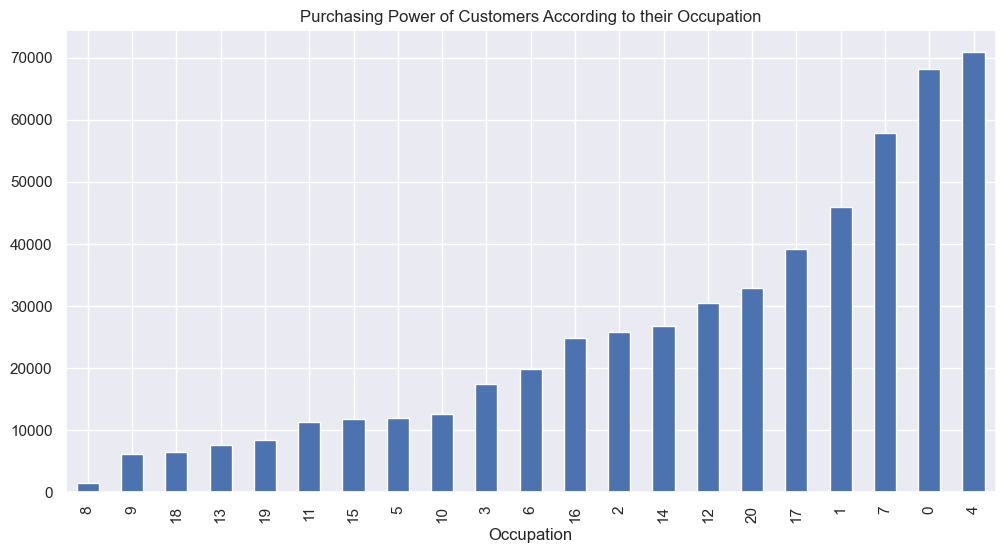

In [26]:
df.groupby('Occupation').size().sort_values().plot(kind="bar",title="Purchasing Power of Customers According to their Occupation")

<Axes: title={'center': 'Spending Power of Customers According to their Occupation'}, xlabel='Occupation'>

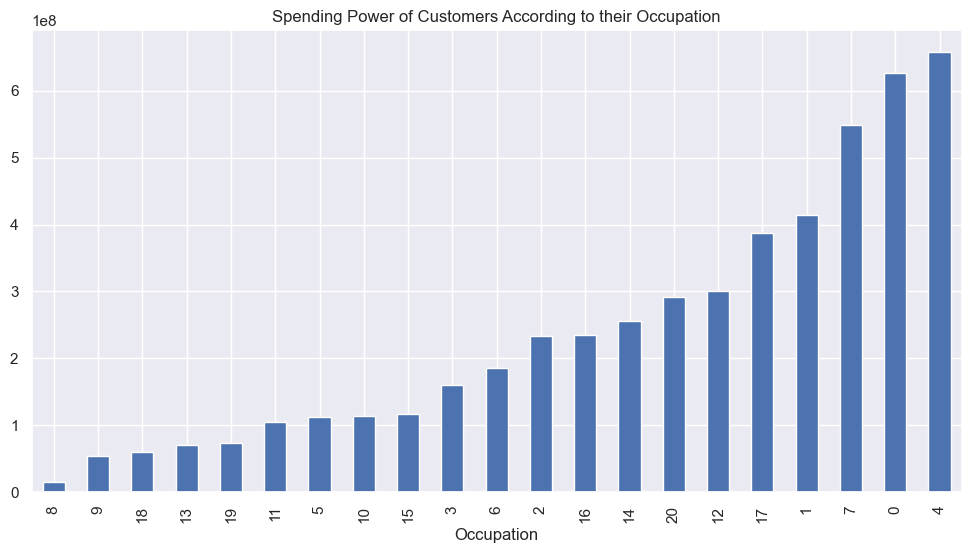

In [27]:
df.groupby('Occupation').sum()['Purchase'].sort_values().plot(kind="bar",title="Spending Power of Customers According to their Occupation")

<Axes: title={'center': 'Customers buying Expensive Products with regards to the Occupation'}, xlabel='Occupation'>

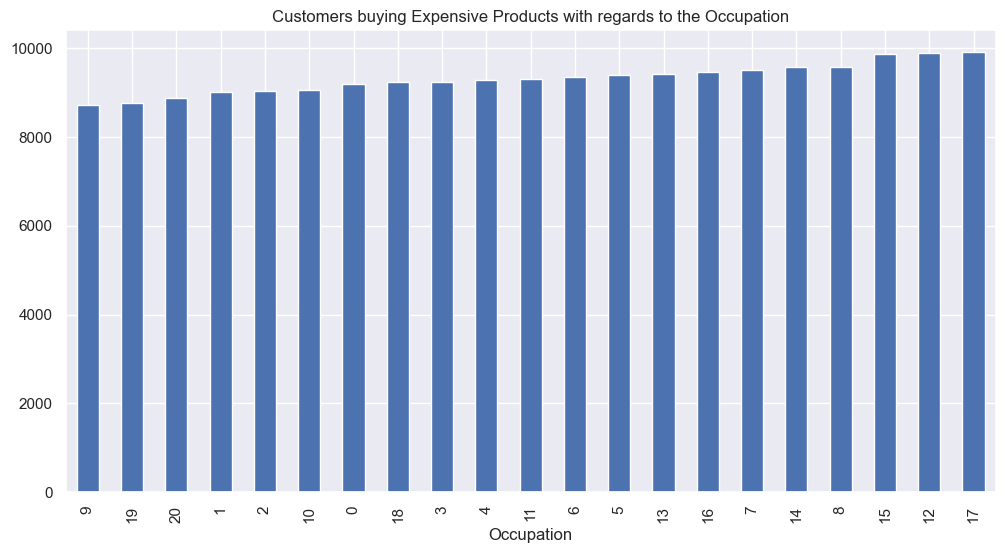

In [28]:
df.groupby('Occupation').mean()['Purchase'].sort_values().plot(kind="bar",title="Customers buying Expensive Products with regards to the Occupation")

<Axes: title={'center': 'Occupations buying more Unique Products'}, xlabel='Occupation'>

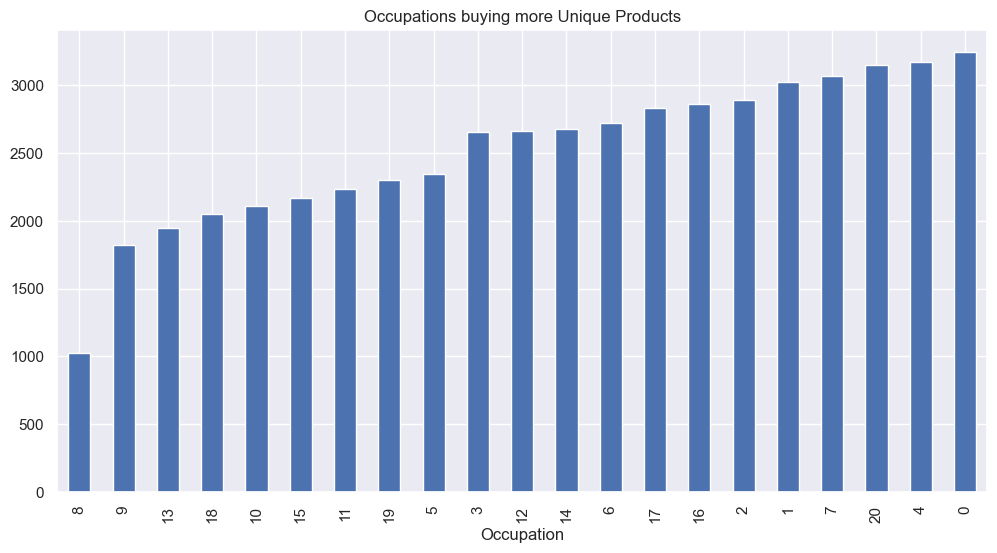

In [29]:
df.groupby('Occupation').nunique()['Product_ID'].sort_values().plot(kind='bar',title="Occupations buying more Unique Products")

### Analysing Product Category 1:

<Axes: title={'center': 'Total Products in every Category '}, xlabel='Product_Category_1'>

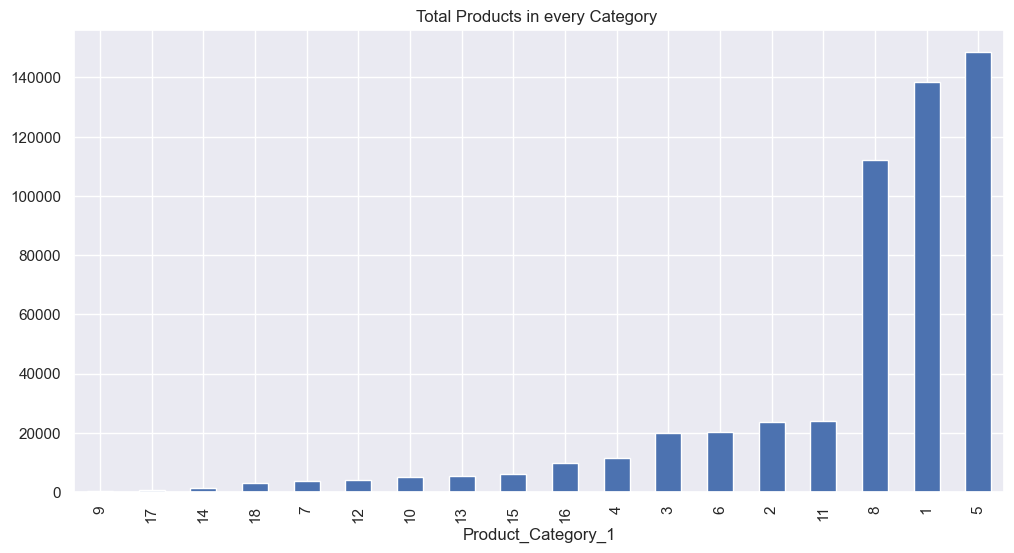

In [30]:
df.groupby("Product_Category_1").size().sort_values().plot(kind='bar',title="Total Products in every Category ")

<Axes: title={'center': 'Amount Spent by Customers'}, xlabel='Product_Category_1'>

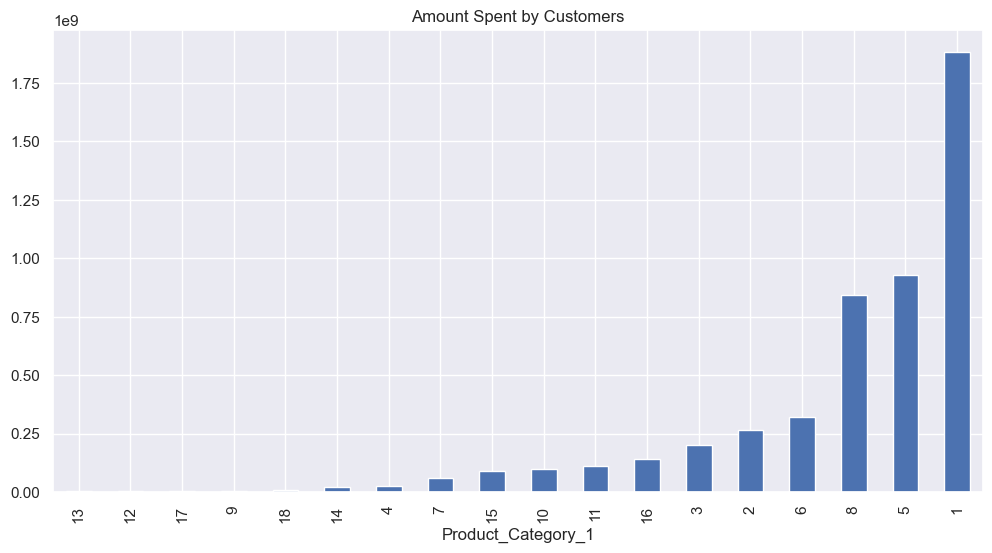

In [31]:
df.groupby("Product_Category_1").sum()["Purchase"].sort_values().plot(kind='bar',title="Amount Spent by Customers")

<Axes: title={'center': 'Amount Spent by Customers'}, xlabel='Product_Category_1'>

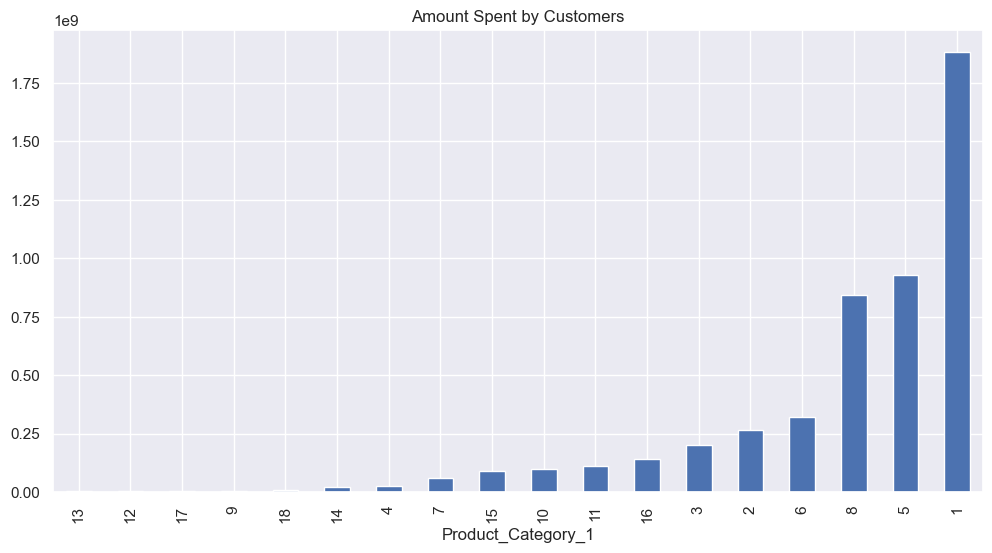

In [32]:
df.groupby("Product_Category_1").sum()["Purchase"].sort_values().plot(kind='bar',title="Amount Spent by Customers")

<Axes: title={'center': 'Top 10 Products Purchased by Customers'}, xlabel='Product_ID'>

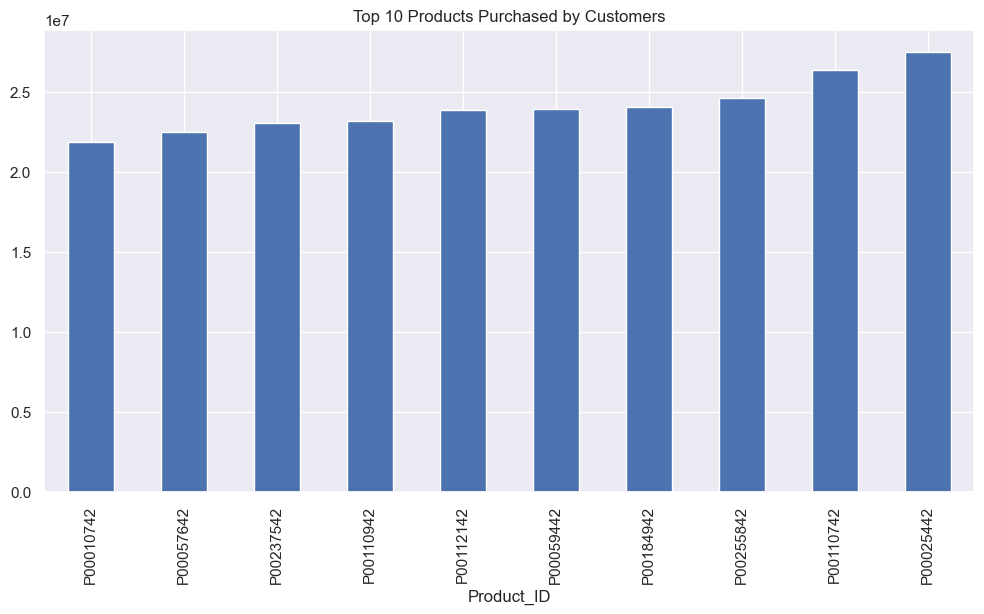

In [33]:
# Top 10 Hot-Selling Products:
df.groupby("Product_ID").sum()["Purchase"].nlargest(10).sort_values().plot(kind="bar",
                                                                           title="Top 10 Products Purchased by Customers")

<Axes: title={'center': 'Top 10 Expensive Products Purchased by Customers'}, xlabel='Product_ID'>

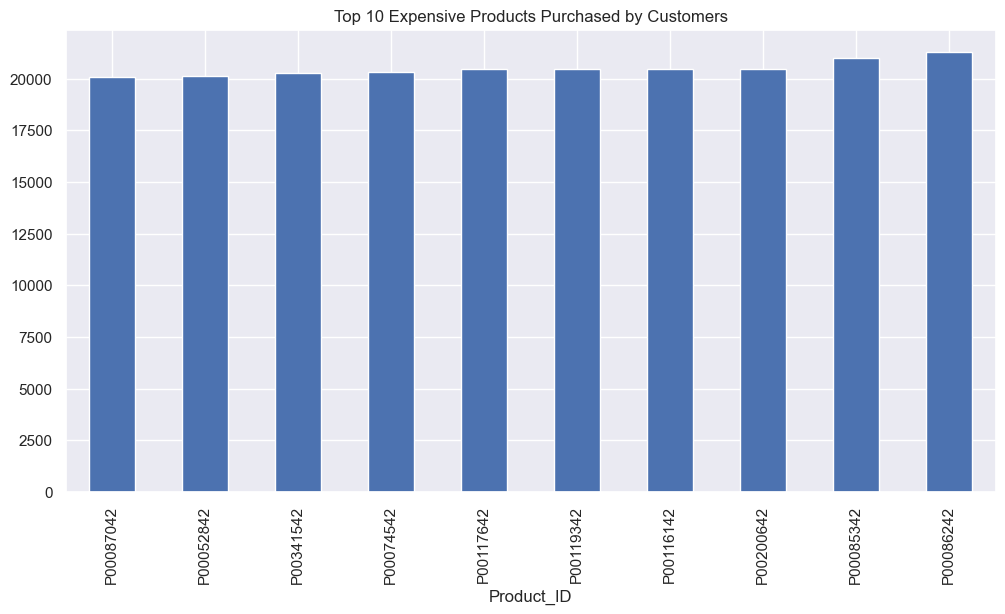

In [34]:
# Top 10 Expensive Products:
df.groupby('Product_ID').mean()["Purchase"].nlargest(10).sort_values().plot(kind='bar',title="Top 10 Expensive Products Purchased by Customers")

### Combining Gender & Marital Status:

So this is the final subtopic in this project, and we've integrated Gender and Marital Status. As a result, utilising seaborn, we can do many types of data visualisations and gain important insights into our data when Gender and Marital Status are coupled with the aid of mostly the countplot.

In [35]:
l=[]
for i in range(len(df)):
    l.append(df['Gender'][i] +"_"+ str(df["Marital_Status"][i]))
df['Marital_Gender']=l
l

['F_0',
 'F_0',
 'F_0',
 'F_0',
 'M_0',
 'M_0',
 'M_1',
 'M_1',
 'M_1',
 'M_1',
 'M_1',
 'M_1',
 'M_1',
 'M_1',
 'F_0',
 'F_0',
 'F_0',
 'F_0',
 'M_1',
 'M_1',
 'M_1',
 'M_1',
 'M_1',
 'M_1',
 'M_1',
 'M_0',
 'M_0',
 'M_0',
 'M_0',
 'F_1',
 'F_1',
 'F_1',
 'F_1',
 'F_1',
 'F_1',
 'F_1',
 'F_1',
 'F_1',
 'F_1',
 'F_1',
 'F_1',
 'F_1',
 'F_1',
 'F_1',
 'F_1',
 'F_1',
 'F_1',
 'F_0',
 'F_0',
 'F_0',
 'M_0',
 'M_0',
 'M_1',
 'M_1',
 'M_1',
 'M_0',
 'M_0',
 'M_0',
 'M_0',
 'M_0',
 'M_0',
 'M_0',
 'M_0',
 'M_0',
 'M_0',
 'F_1',
 'F_1',
 'M_0',
 'M_0',
 'M_0',
 'F_0',
 'F_0',
 'F_0',
 'F_0',
 'F_0',
 'F_0',
 'F_0',
 'F_0',
 'F_0',
 'F_0',
 'F_0',
 'F_0',
 'F_0',
 'F_0',
 'F_0',
 'M_0',
 'M_0',
 'M_0',
 'M_0',
 'M_0',
 'M_0',
 'M_0',
 'M_0',
 'M_0',
 'M_0',
 'M_0',
 'M_0',
 'M_0',
 'M_0',
 'M_0',
 'M_0',
 'M_0',
 'M_0',
 'M_0',
 'M_0',
 'M_0',
 'M_0',
 'M_0',
 'M_0',
 'M_0',
 'M_0',
 'M_0',
 'M_1',
 'M_1',
 'M_1',
 'M_1',
 'M_1',
 'M_1',
 'M_1',
 'M_1',
 'M_1',
 'M_1',
 'M_1',
 'M_1',
 'F_1',


[Text(0.5, 1.0, 'Plotting of Marital Status and Gender')]

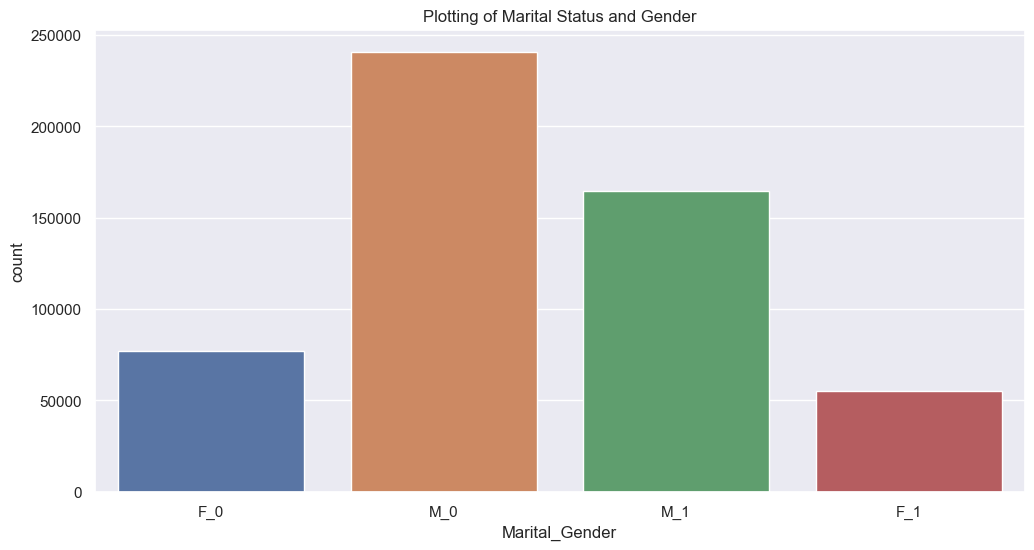

In [36]:
sns.countplot(x=df["Marital_Gender"]).set(title="Plotting of Marital Status and Gender")

[Text(0.5, 1.0, 'Plotting of Marital Gender with Age')]

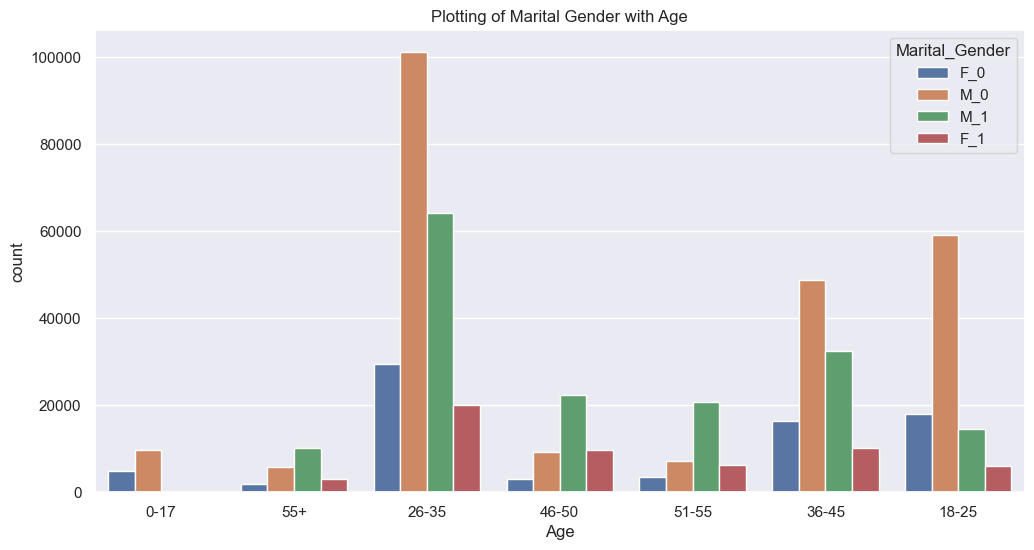

In [37]:
sns.countplot(x=df["Age"],hue=df['Marital_Gender']).set(title="Plotting of Marital Gender with Age")

[Text(0.5, 1.0, 'Plotting of Marital Gender with City Category')]

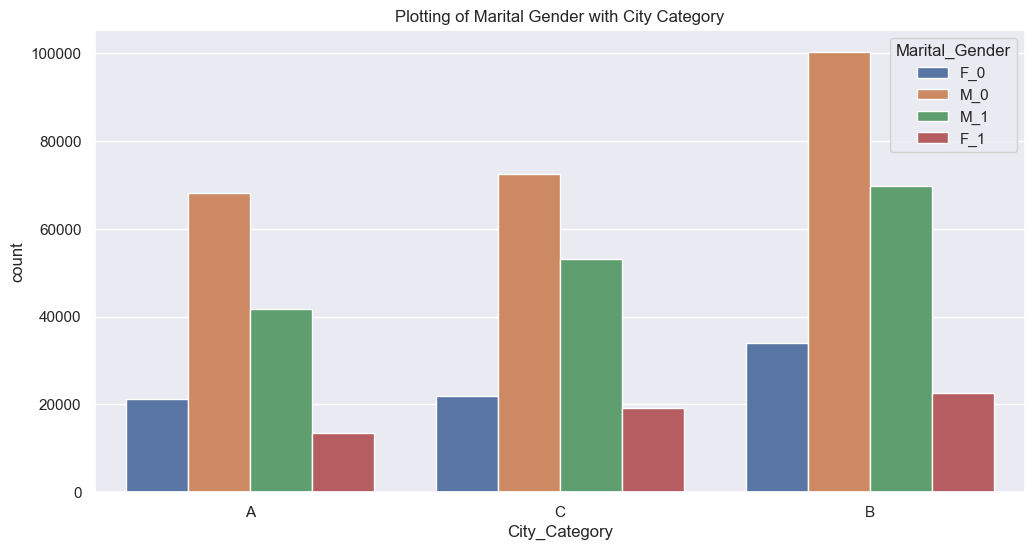

In [38]:
sns.countplot(x=df["City_Category"],hue=df['Marital_Gender']).set(title="Plotting of Marital Gender with City Category")

[Text(0.5, 1.0, 'Plotting of Marital Gender with Product Category_1')]

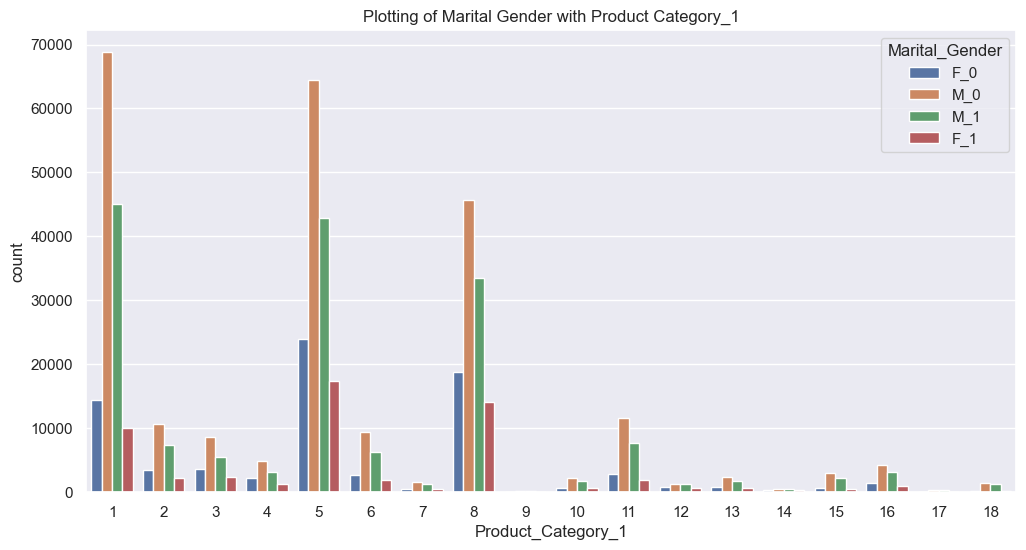

In [39]:
sns.countplot(x=df["Product_Category_1"],hue=df['Marital_Gender']).set(title="Plotting of Marital Gender with Product Category_1")

##### EDA:
The insights made from the data visualisation as part of the Data Learning process are listed below:
1. Male customers make around 75% of all purchases, with female customers making the remaining 25%. This indicates that male users account for the majority of the commercial store's revenues. On average, males spend more money on purchases than females, and this trend may be observed by summing the total value of purchases.
2. We discovered that Unmarried Men spend the most on Black Friday when we coupled Purchase and Marital_Status for study. It also shows that men tend to spend less when they marry. It could be due of the increased obligations.
3. There is a fascinating column. Stay_In_Current_City_Years, after studying this column, we discovered that those who have lived in the city for one year likely to spend the most. This is comprehensible because people who have lived in the city for more than four years are often more established and less interested in buying new goods than people who are new to the city, who tend to spend more.
5. Surprisingly, when we examined which city the item was purchased in, we discovered that, while city B is mostly responsible for overall sales revenue, the aforesaid product was primarily purchased in city C.
4. For the Age feature, we discovered that consumers between the ages of 25 and 40 spend the most.



### Preparing our Data for Modeling:

In [40]:
# Removing Unwanted Columns
df.drop(columns=['User_ID', 'Product_ID'], inplace=True)
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase,Marital_Gender
0,F,0-17,10,A,2,0,3,8370,F_0
1,F,0-17,10,A,2,0,1,15200,F_0
2,F,0-17,10,A,2,0,12,1422,F_0
3,F,0-17,10,A,2,0,12,1057,F_0
4,M,55+,16,C,4+,0,8,7969,M_0


In [41]:
categorical_cols=['Gender', 'Age','City_Category',  'Product_Category_1', 'Marital_Gender']
le=LabelEncoder()
for i in categorical_cols:
    df[i]=le.fit_transform(df[i])
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase,Marital_Gender
0,0,0,10,0,2,0,2,8370,0
1,0,0,10,0,2,0,0,15200,0
2,0,0,10,0,2,0,11,1422,0
3,0,0,10,0,2,0,11,1057,0
4,1,6,16,2,4+,0,7,7969,2


In [42]:
#Changing the value from string to numeric for better processing:
df.loc[df['Stay_In_Current_City_Years'] == '4+']=4
df.loc[df['Stay_In_Current_City_Years'] == 4]
df['Stay_In_Current_City_Years']=pd.to_numeric(df['Stay_In_Current_City_Years'],errors='coerce')

In [43]:
X=df.drop("Purchase",axis=1)
y=df['Purchase']

#### Model Training:

In [44]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.20)

In [45]:
#Creating a list to save all model scores:
all_models=[]

Results: 
Intercept of the model:  10040.421972903103
Coefficents of the model:  [-2486.07614328   112.62817154     5.16045532   353.98486803
    10.82345571 -1598.80344669  -415.71861624  1508.89576238] 

MAE of Linear Regression Model:  3073.160073293568
MSE of Linear Regression Model:  18866709.153102566
R-Squared Error of Linear Regression Model:  0.41619381875818706


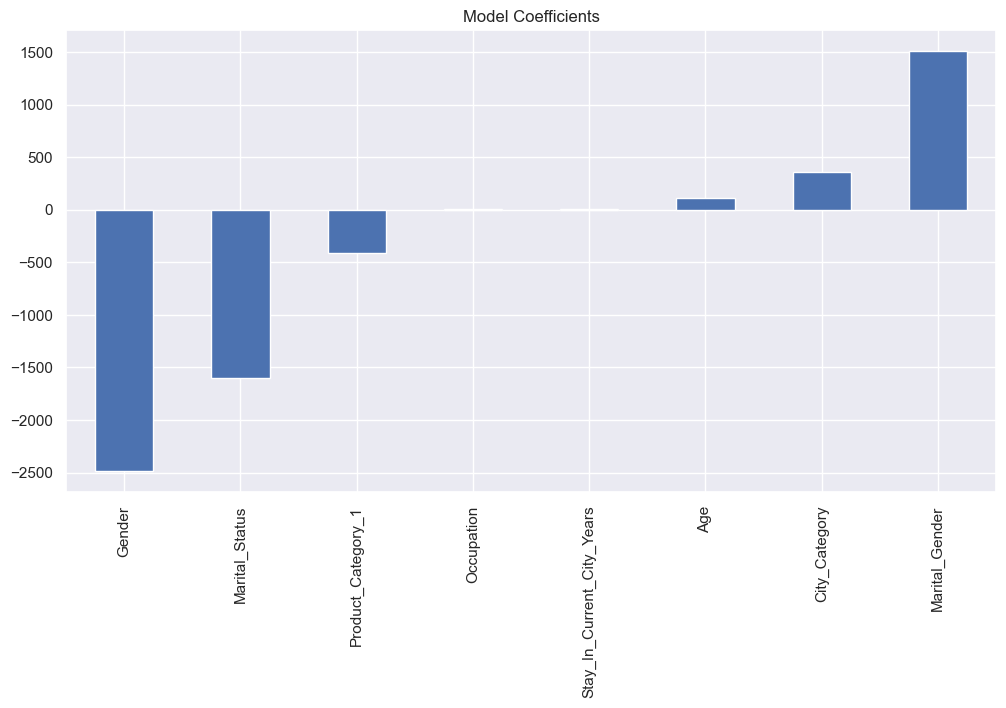

In [46]:
#Linear Model:
linear_model=LinearRegression(copy_X=True,fit_intercept=True,
                              n_jobs=None)
linear_model.fit(X_train,y_train)
y_pred_linear=linear_model.predict(X_test)

linear_coef=pd.Series(linear_model.coef_, X.columns).sort_values()
linear_coef.plot(kind='bar', title="Model Coefficients")

linear_mae=mean_absolute_error(y_test, y_pred_linear)
linear_mse=mean_squared_error(y_test, y_pred_linear)
linear_r_squared=r2_score(y_test, y_pred_linear)

print("Results: \nIntercept of the model: ",linear_model.intercept_)
print("Coefficents of the model: ",linear_model.coef_,"\n")
print("MAE of Linear Regression Model: ",linear_mae)
print("MSE of Linear Regression Model: ",linear_mse)
print("R-Squared Error of Linear Regression Model: ",linear_r_squared)

all_models.append({'Model Name': 'Linear Regression',
                          'MAE': linear_mae,
                          'MSE': linear_mse,
                          'R-Squared Error': linear_r_squared})

In [47]:
#Decision Tree Regressor()
decision_model=DecisionTreeRegressor(max_depth=25,random_state=42,)
decision_model.fit(X_train,y_train)
y_pred_decision=decision_model.predict(X_test)

decision_mae=mean_absolute_error(y_test, y_pred_decision)
decision_mse=mean_squared_error(y_test, y_pred_decision)
decision_r_squared=r2_score(y_test, y_pred_decision)

print("MAE of Decision Tree Regressor Model: ",decision_mae)
print("MSE of Decision Tree Regressor Model: ",decision_mse)
print("R-Squared Error of Decision Tree Regressor Model: ",decision_r_squared)

all_models.append({'Model Name': 'Decision Tree Regressor',
                          'MAE': decision_mae,
                          'MSE': decision_mse,
                          'R-Squared Error': decision_r_squared})

MAE of Decision Tree Regressor Model:  1867.004284387274
MSE of Decision Tree Regressor Model:  7600644.1251187865
R-Squared Error of Decision Tree Regressor Model:  0.7648077899725337


<Axes: title={'center': 'Feature Importance'}>

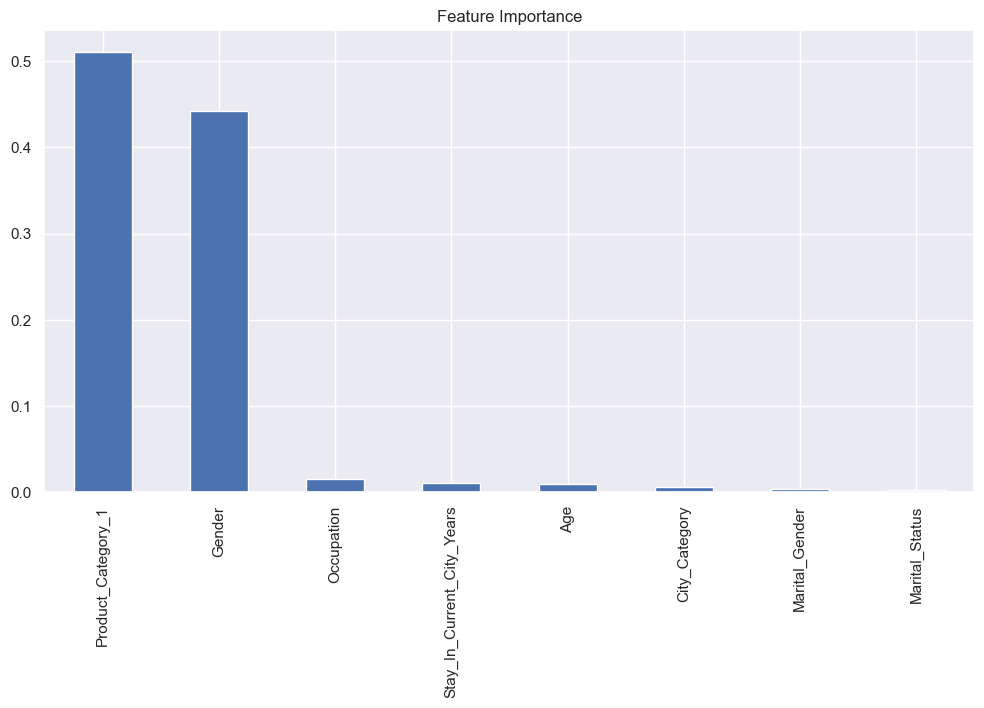

In [48]:
features = pd.Series(decision_model.feature_importances_, X.columns).sort_values(ascending=False)
features.plot(kind='bar', title='Feature Importance')

In [49]:
#Random Forest Model:
randomforest_model=RandomForestRegressor(n_estimators=100,max_depth=5,
                                         min_samples_leaf=50,n_jobs=4,
                                        random_state=42)
randomforest_model.fit(X_train,y_train)
y_pred_randomforest=randomforest_model.predict(X_test)

randomforest_mae=mean_absolute_error(y_test, y_pred_randomforest)
randomforest_mse=mean_squared_error(y_test, y_pred_randomforest)
randomforest_r_squared=r2_score(y_test, y_pred_randomforest)

print("MAE of Random Forest Model: ",randomforest_mae)
print("MSE of Random Forest Model: ",randomforest_mse)
print("MSE of Random Forest Model: ",randomforest_r_squared)

all_models.append({'Model Name': 'Random Forest Regressor',
                          'MAE': randomforest_mae,
                          'MSE': randomforest_mse,
                          'R-Squared Error': randomforest_r_squared})

MAE of Random Forest Model:  2316.7837690344536
MSE of Random Forest Model:  11502535.58518535
MSE of Random Forest Model:  0.6440687498762432


In [50]:
#Lasso Model: 
lasso_model=Lasso(alpha=0.05)
lasso_model.fit(X_train,y_train)
y_pred_lasso=lasso_model.predict(X_test)

lasso_mae=mean_absolute_error(y_test, y_pred_lasso)
lasso_mse=mean_squared_error(y_test, y_pred_lasso)
lasso_r_squared=r2_score(y_test, y_pred_lasso)

print("MAE of Random Forest Model: ",lasso_mae)
print("MSE of Random Forest Model: ",lasso_mse)
print("R-Squared Error of Random Forest Model: ",lasso_r_squared)

all_models.append({'Model Name': 'Lasso Regression',
                          'MAE': lasso_mae,
                          'MSE': lasso_mse,
                          'R-Squared Error': lasso_r_squared})

MAE of Random Forest Model:  3073.1796824667426
MSE of Random Forest Model:  18866715.161249563
R-Squared Error of Random Forest Model:  0.41619363284376354


In [51]:
#XGB Model:
XGB_model=XGBRegressor(n_estimators=100,max_depth=6,random_state=42,)
XGB_model.fit(X_train,y_train)
y_pred_XGB=XGB_model.predict(X_test)

XGB_mae=mean_absolute_error(y_test, y_pred_XGB)
XGB_mse=mean_squared_error(y_test, y_pred_XGB)
XGB_r_squared=r2_score(y_test, y_pred_XGB)

print("MAE of XGB Model: ",XGB_mae)
print("MSE of XGB Model: ",XGB_mse)
print("R-Squared Error of XGB Model Model: ",XGB_r_squared)

all_models.append({'Model Name': 'XGBoost Regressor',
                          'MAE': XGB_mae,
                          'MSE': XGB_mse,
                          'R-Squared Error': XGB_r_squared})

MAE of XGB Model:  1885.3617005856195
MSE of XGB Model:  7427657.809254149
R-Squared Error of XGB Model Model:  0.7701606302401443


In [52]:
#CAT Model:
CAT_model=CatBoostRegressor(verbose=False,iterations=25,depth=15,
                           learning_rate=1)
CAT_model.fit(X_train,y_train)
y_pred_CAT=CAT_model.predict(X_test)

CAT_mae=mean_absolute_error(y_test, y_pred_CAT)
CAT_mse=mean_squared_error(y_test, y_pred_CAT)
CAT_r_squared=r2_score(y_test, y_pred_CAT)

print("MAE of CAT Model: ",CAT_mae)
print("MSE of CAT Model: ",CAT_mse)
print("R-Squared Error of CAT Model Model: ",CAT_r_squared)

all_models.append({'Model Name': 'CAT Regressor',
                          'MAE': CAT_mae,
                          'MSE': CAT_mse,
                          'R-Squared Error': CAT_r_squared})

MAE of CAT Model:  1856.7522231028363
MSE of CAT Model:  7341700.8575111
R-Squared Error of CAT Model Model:  0.772820458159315


In [53]:
#Printing our model list with their scores:
all_models=pd.DataFrame(all_models).sort_values(by='MAE')
all_models

,Model Name,MAE,MSE,R-Squared Error
5,CAT Regressor,1856.752223,7.341701e+06,0.772820
1,Decision Tree Regressor,1867.004284,7.600644e+06,0.764808
4,XGBoost Regressor,1885.361701,7.427658e+06,0.770161
2,Random Forest Regressor,2316.783769,1.150254e+07,0.644069
0,Linear Regression,3073.160073,1.886671e+07,0.416194
3,Lasso Regression,3073.179682,1.886672e+07,0.416194


#### Conclusion:

After conducting various regression analyses on the dataset, we evaluated the performance of multiple models to predict purchase amounts during the Black Friday shopping event. Here are the results:

The CatBoost Regressor performed the best among all the models, with a Mean Absolute Error (MAE) of 1856.75, Mean Squared Error (MSE) of 7,341,701, and a relatively high R-Squared Error of 0.77. This indicates that the model's predictions are close to the actual purchase amounts, and it explains around 77% of the variance in the data.

Decision Tree Regressor showed good performance with an MAE of 1867.00 and an MSE of 7,600,644. However, it had a slightly lower R-Squared Error of 0.76 compared to the CAT Regressor.

XGBoost Regressor also demonstrated favorable results with an MAE of 1885.36, MSE of 7,427,658, and an R-Squared Error of 0.77, similar to the CAT Regressor.

Random Forest Regressor obtained an MAE of 2316.78 and a relatively higher MSE of 11,502,540, with an R-Squared Error of 0.64. While the model performed reasonably well, it was outperformed by the CAT Regressor, Decision Tree Regressor, and XGBoost Regressor.

Linear Regression model showed the highest errors with an MAE of 3073.16 and an MSE of 18,866,710. The R-Squared Error was also lower at 0.42, indicating that the linear model had limitations in capturing the complexity of the data.

Lasso Regression performed similarly to the Linear Regression with an MAE of 3073.18, MSE of 18,866,720, and an R-Squared Error of 0.42.

In conclusion, the CAT Regressor proved to be the most effective model for predicting purchase amounts during the Black Friday shopping event. It displayed the lowest errors and the highest R-Squared Error, indicating better predictive performance and explaining a significant portion of the variance in the data. Businesses can leverage these regression models to gain insights into customer purchase behavior, optimize product offerings, and enhance marketing strategies for future Black Friday events. 